This is how much space the figure will take up on letter paper


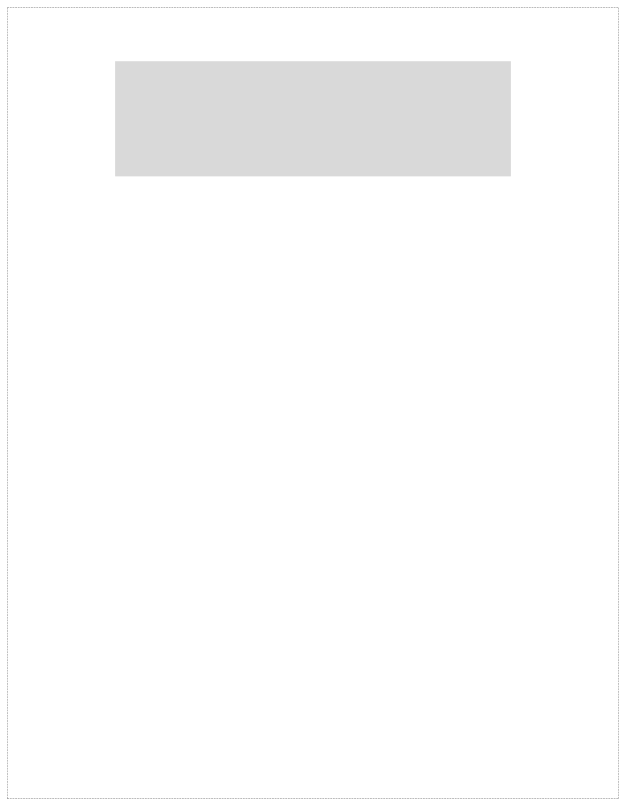

In [4]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

Square asymetric noise

In [1]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2

100%|██████████| 10000/10000 [00:21<00:00, 455.71it/s]


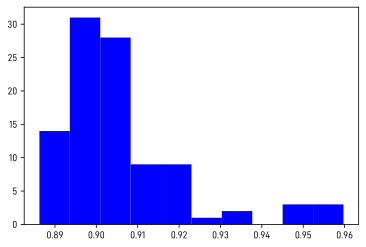

0.8862475


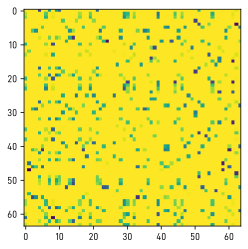

100%|██████████| 10000/10000 [00:18<00:00, 547.21it/s]


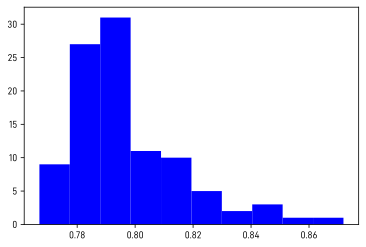

0.7669685


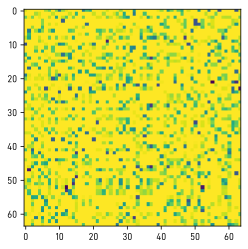

100%|██████████| 10000/10000 [00:18<00:00, 538.42it/s]


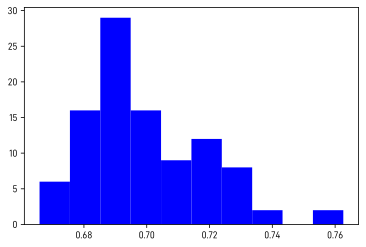

0.6658673


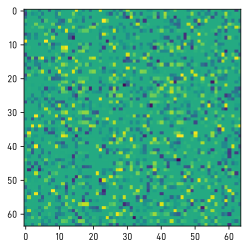

100%|██████████| 10000/10000 [00:19<00:00, 518.61it/s]


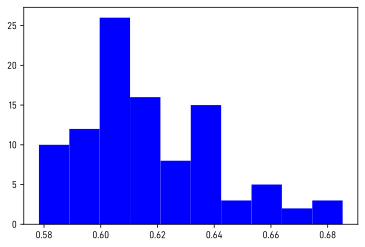

0.5782094


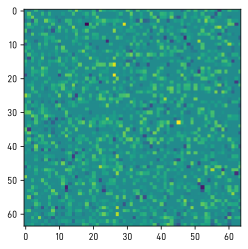

100%|██████████| 10000/10000 [00:19<00:00, 502.25it/s]


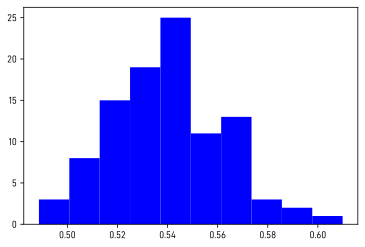

0.4886611


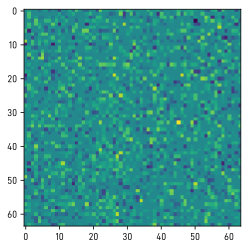

100%|██████████| 10000/10000 [00:20<00:00, 490.59it/s]


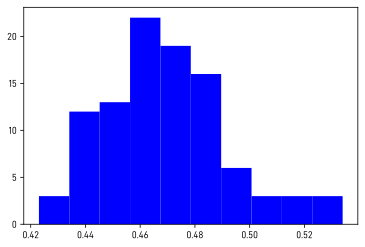

0.423012


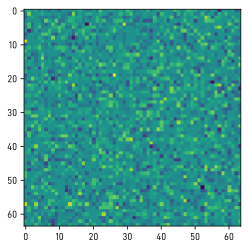

100%|██████████| 10000/10000 [00:20<00:00, 477.00it/s]


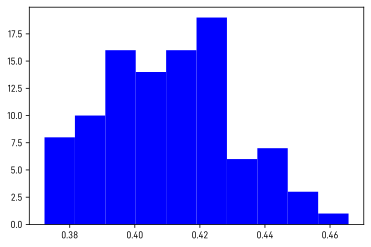

0.3722493


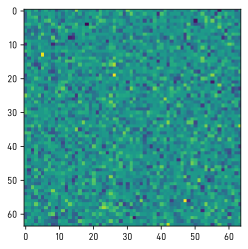

100%|██████████| 10000/10000 [00:21<00:00, 455.83it/s]


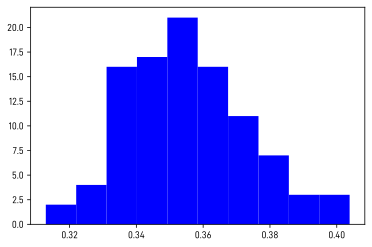

0.3128842


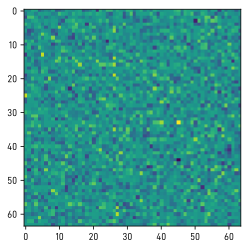

100%|██████████| 10000/10000 [00:24<00:00, 403.35it/s]


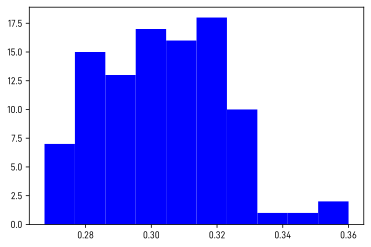

0.2674971


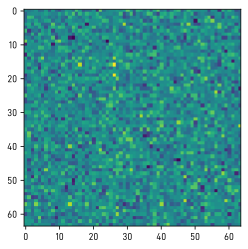

100%|██████████| 10000/10000 [00:26<00:00, 377.97it/s]


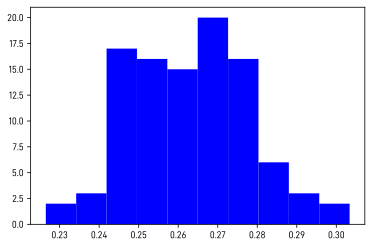

0.2265098


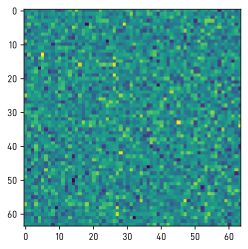

100%|██████████| 10000/10000 [00:28<00:00, 351.33it/s]


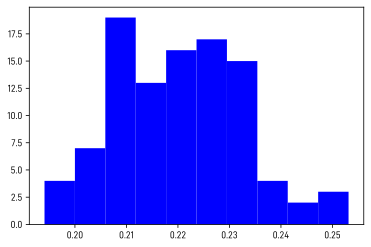

0.194095


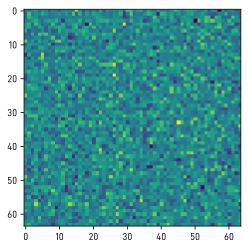

100%|██████████| 10000/10000 [00:29<00:00, 336.40it/s]


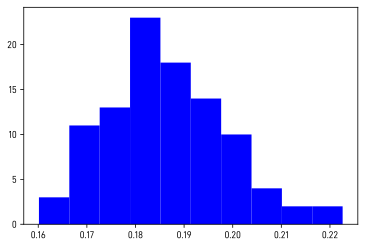

0.1601433


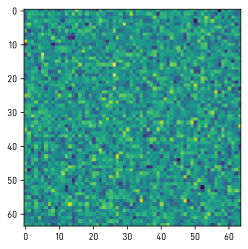

100%|██████████| 10000/10000 [00:32<00:00, 310.77it/s]


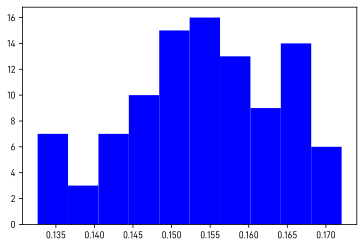

0.1326383


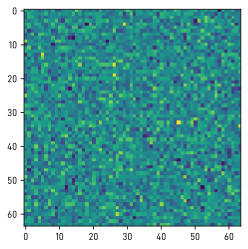

100%|██████████| 10000/10000 [00:34<00:00, 288.79it/s]


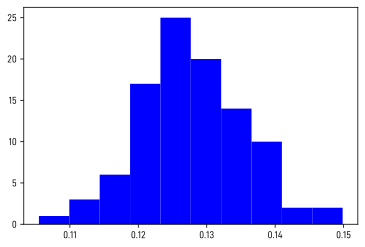

0.1054799


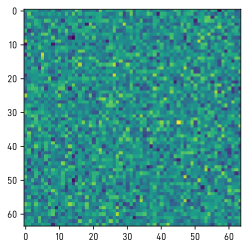

100%|██████████| 10000/10000 [00:36<00:00, 274.89it/s]


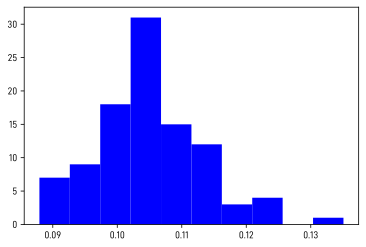

0.0879271


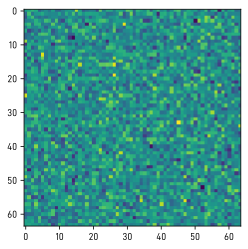

100%|██████████| 10000/10000 [00:37<00:00, 270.07it/s]


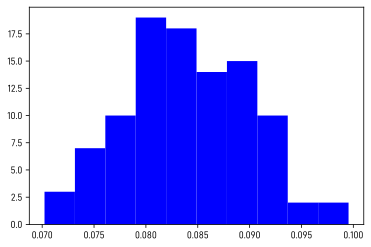

0.070225


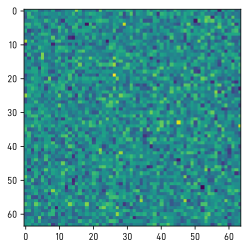

100%|██████████| 10000/10000 [00:42<00:00, 237.52it/s]


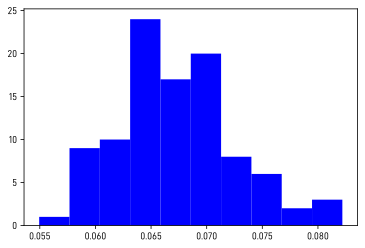

0.0549454


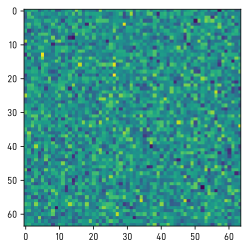

100%|██████████| 10000/10000 [00:44<00:00, 225.81it/s]


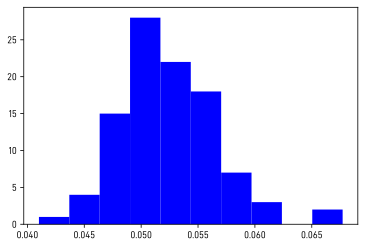

0.0410137


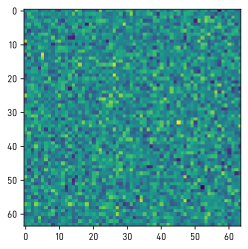

100%|██████████| 10000/10000 [00:46<00:00, 214.47it/s]


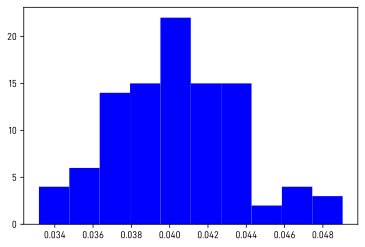

0.0331735


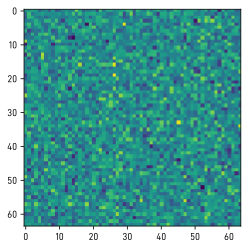

100%|██████████| 10000/10000 [00:47<00:00, 209.78it/s]


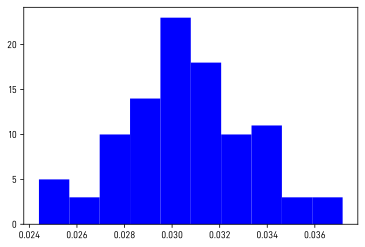

0.0244024


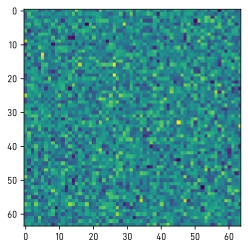

100%|██████████| 10000/10000 [00:50<00:00, 197.03it/s]


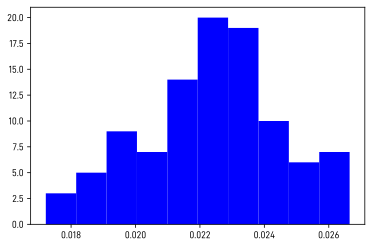

0.0172155


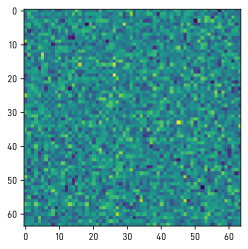

100%|██████████| 10000/10000 [00:52<00:00, 189.86it/s]


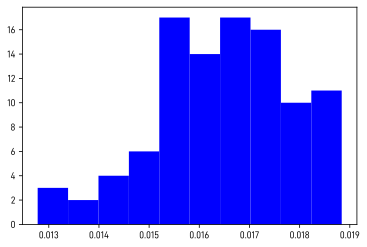

0.0127785


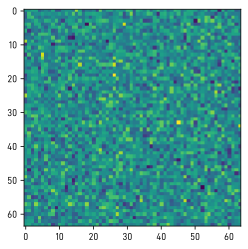

100%|██████████| 10000/10000 [00:55<00:00, 181.17it/s]


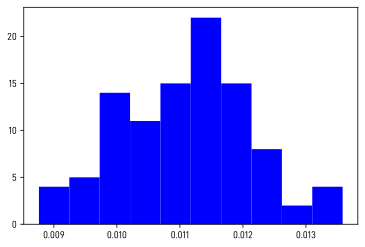

0.0087629


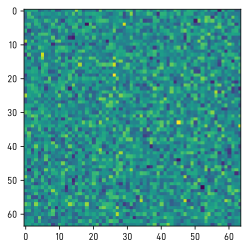

100%|██████████| 10000/10000 [01:11<00:00, 140.56it/s]


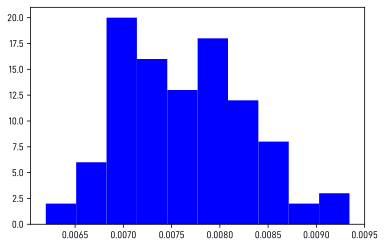

0.0061962


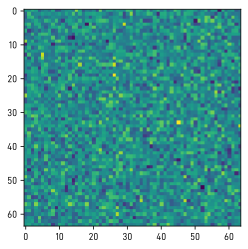

100%|██████████| 10000/10000 [01:03<00:00, 158.06it/s]


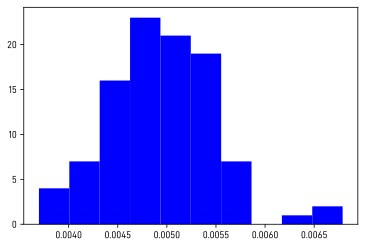

0.0036973


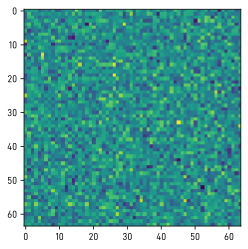

100%|██████████| 10000/10000 [01:19<00:00, 125.64it/s]


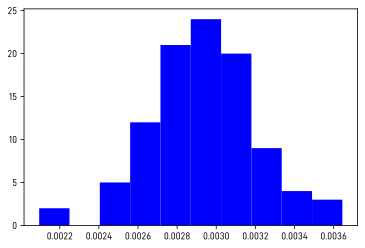

0.0020948


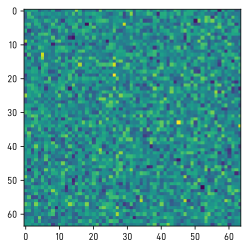

100%|██████████| 10000/10000 [01:22<00:00, 121.63it/s]


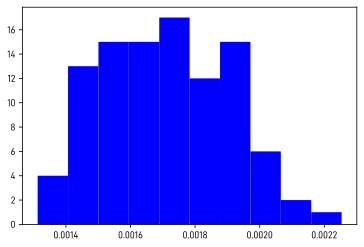

0.0013125


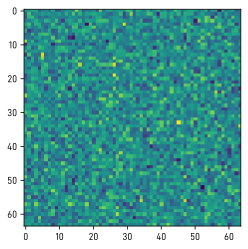

100%|██████████| 10000/10000 [01:23<00:00, 119.53it/s]


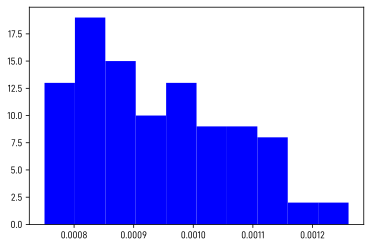

0.0007504


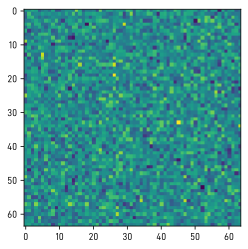

100%|██████████| 10000/10000 [01:28<00:00, 112.47it/s]


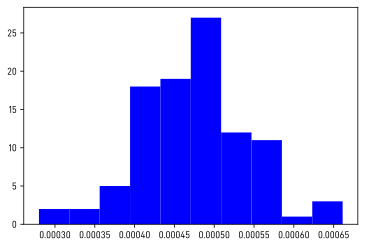

0.0002799


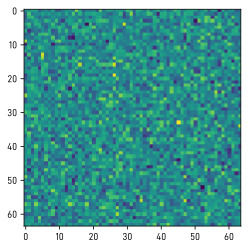

100%|██████████| 10000/10000 [01:32<00:00, 108.42it/s]


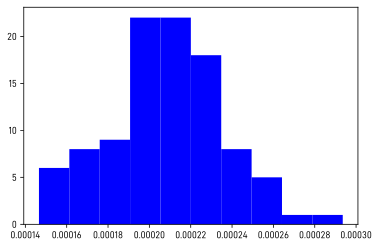

0.0001466


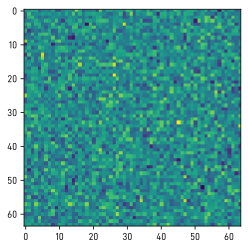

100%|██████████| 10000/10000 [01:36<00:00, 103.81it/s]


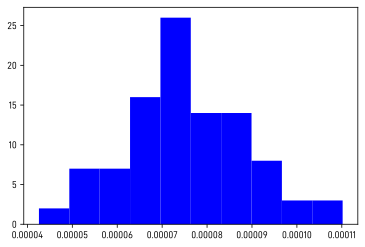

4.26e-05


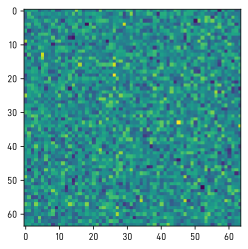

100%|██████████| 10000/10000 [01:36<00:00, 103.66it/s]


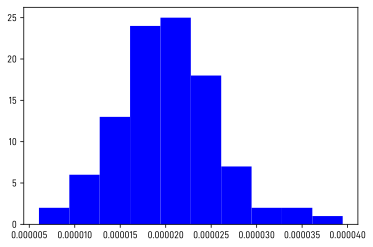

6.1e-06


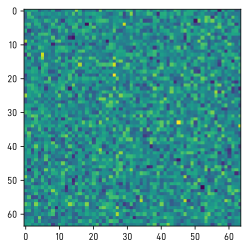

100%|██████████| 10000/10000 [01:43<00:00, 96.71it/s]


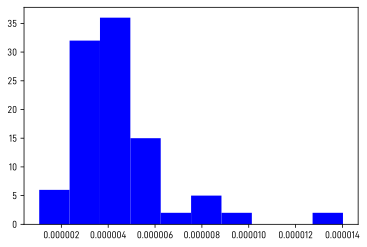

1.1e-06


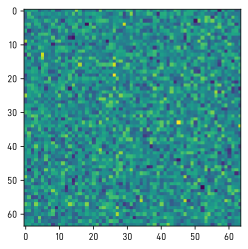

100%|██████████| 10000/10000 [01:41<00:00, 98.26it/s]


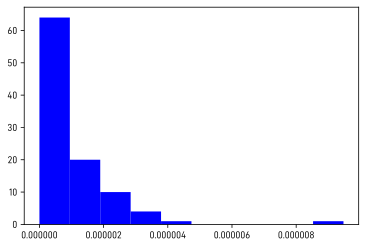

0.0


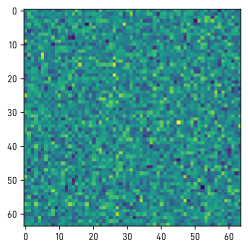

[0.8862475, 0.7669685, 0.6658673, 0.5782094, 0.4886611, 0.423012, 0.3722493, 0.3128842, 0.2674971, 0.2265098, 0.194095, 0.1601433, 0.1326383, 0.1054799, 0.0879271, 0.070225, 0.0549454, 0.0410137, 0.0331735, 0.0244024, 0.0172155, 0.0127785, 0.0087629, 0.0061962, 0.0036973, 0.0020948, 0.0013125, 0.0007504, 0.0002799, 0.0001466, 4.26e-05, 6.1e-06, 1.1e-06, 0.0]


In [9]:
n = 64
batch_size = 100
errors = []
target = torch.normal(0.0, 1.0, (n, n))

for k in range(1,35):
    u0=1/1000*torch.randn([batch_size, len(target), k], device="cuda") 
    v0=1/1000*torch.randn([batch_size, len(target), k], device="cuda") 

    a=torch.randn([batch_size, k], device="cuda")
    b=torch.randn([batch_size], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=10000)
    fac.fit(
        target,
        u0=u0,
        v0=v0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    open('gaus_noise_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [7]:
s_vals = []
U0, S0, V0 = np.linalg.svd(target.detach().numpy())
for s in range(1, target.shape[0]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), target)),7))

In [8]:
s_vals

[0.9419381,
 0.8859344,
 0.8338748,
 0.7864932,
 0.7406089,
 0.6979499,
 0.659099,
 0.6211723,
 0.5844578,
 0.55076,
 0.5181491,
 0.4868715,
 0.4586237,
 0.4309303,
 0.4039496,
 0.3776128,
 0.3533512,
 0.330026,
 0.3084247,
 0.2876189,
 0.2672495,
 0.2476121,
 0.2287604,
 0.2118642,
 0.196,
 0.1805781,
 0.1658921,
 0.1525258,
 0.139913,
 0.1276961,
 0.1162281,
 0.1054009,
 0.095642,
 0.086845,
 0.0787343,
 0.0706709,
 0.0634952,
 0.0569403,
 0.0507993,
 0.0450045,
 0.0392346,
 0.0343562,
 0.029748,
 0.0256254,
 0.0220613,
 0.0186359,
 0.0156476,
 0.0127932,
 0.0102799,
 0.0083111,
 0.006655,
 0.0052896,
 0.0041216,
 0.0031587,
 0.0023187,
 0.0016555,
 0.0010624,
 0.0006276,
 0.0003136,
 0.0001735,
 8.66e-05,
 2.59e-05,
 6.6e-06,
 0.0]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

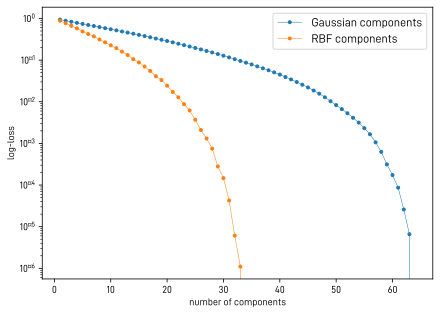

In [16]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(s_vals)+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [14]:
open('gn_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

906

In [15]:
errs, s_vals = pickle.load(open("gn_losses.pickle", "rb"))